In [1]:
import numpy as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## Load Dataset

In [5]:
kidney_dataset = pd.read_csv('kidney_disease.csv')
kidney_dataset.sample()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
314,314,39.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,41,9400,4.7,no,no,no,good,no,no,notckd


In [6]:
kidney_dataset = kidney_dataset.drop(['id','age'], axis=1)

In [7]:
kidney_dataset.sample()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
195,90.0,1.02,2.0,1.0,abnormal,abnormal,notpresent,present,184.0,98.6,...,NaN,NaN,NaN,yes,yes,yes,poor,no,no,ckd


In [8]:
kidney_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              388 non-null    float64
 1   sg              353 non-null    float64
 2   al              354 non-null    float64
 3   su              351 non-null    float64
 4   rbc             248 non-null    object 
 5   pc              335 non-null    object 
 6   pcc             396 non-null    object 
 7   ba              396 non-null    object 
 8   bgr             356 non-null    float64
 9   bu              381 non-null    float64
 10  sc              383 non-null    float64
 11  sod             313 non-null    float64
 12  pot             312 non-null    float64
 13  hemo            348 non-null    float64
 14  pcv             330 non-null    object 
 15  wc              295 non-null    object 
 16  rc              270 non-null    object 
 17  htn             398 non-null    obj

In [10]:
numerical = []
catgcols = []

for col in kidney_dataset.columns:
    if kidney_dataset[col].dtype == "float64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in numerical:
    kidney_dataset[col].fillna(kidney_dataset[col].median(), inplace=True)

for col in catgcols:
    kidney_dataset[col].fillna(kidney_dataset[col].mode()[0], inplace=True)

In [11]:
numerical

['bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [12]:
catgcols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [13]:
kidney_dataset['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [14]:
kidney_dataset['classification'] = kidney_dataset['classification'].replace(['ckd\t'], 'ckd')

In [15]:
kidney_dataset['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [16]:
ind_col = [col for col in kidney_dataset if col != 'classification']
dep_col = 'classification'

In [17]:
kidney_dataset[dep_col].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

## Transformasi Dataset

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    kidney_dataset[col] = le.fit_transform(kidney_dataset[col])

In [21]:
kidney_dataset['classification'] = le.fit_transform(kidney_dataset['classification'])

In [22]:
X = kidney_dataset[ind_col] #Feature
Y = kidney_dataset[dep_col] #Label

In [23]:
kidney_dataset.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,...,32,72,34,1,4,1,0,0,0,0
1,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,...,26,56,34,0,3,1,0,0,0,0
2,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,...,19,70,34,0,4,1,1,0,1,0
3,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,...,20,62,19,1,3,1,1,1,1,0
4,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,...,23,68,27,0,3,1,0,0,0,0


In [26]:
kidney_dataset.to_csv('kidney sudah clean.csv',index=False)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)


## Membuat Model Decision Tree

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(X_train, Y_train)

dtc_acc_train = accuracy_score(Y_train, dtc.predict(X_train))
dtc_acc_test = accuracy_score(Y_test, dtc.predict(X_test))

print(f"akurasi data training: {dtc_acc_train}")
print(f"akurasi data testing: {dtc_acc_test}\n")

print(f"confusion matrix :\n{confusion_matrix(Y_test, dtc.predict(X_test))}\n")
confusion = confusion_matrix(Y_test, dtc.predict(X_test))
tn, fp, fn, tp = confusion.ravel()
print(f"classification report :\n{classification_report(Y_test, dtc.predict(X_test))}")


akurasi data training: 0.99375
akurasi data testing: 1.0

confusion matrix :
[[52  0]
 [ 0 28]]

classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## Simulasi Model

In [43]:
import numpy as np

input_data = (80, 1.02, 1, 0, 1, 1, 0, 0, 121, 36, 1.2, 138, 4.4, 15.4, 32, 72, 34, 1, 4, 1, 0, 0, 0,)
input_data_as_numpy_array = np.array(input_data)  # Use np.array instead of kidney_dataset.array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)

print(prediction)

if prediction[0] == 0:
    print('Pasien tidak terkena Batu Ginjal')
else:
    print('Pasien terkena Batu Ginjal')


[0]
Pasien tidak terkena Batu Ginjal


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Visualisasi Pohon Keputusan

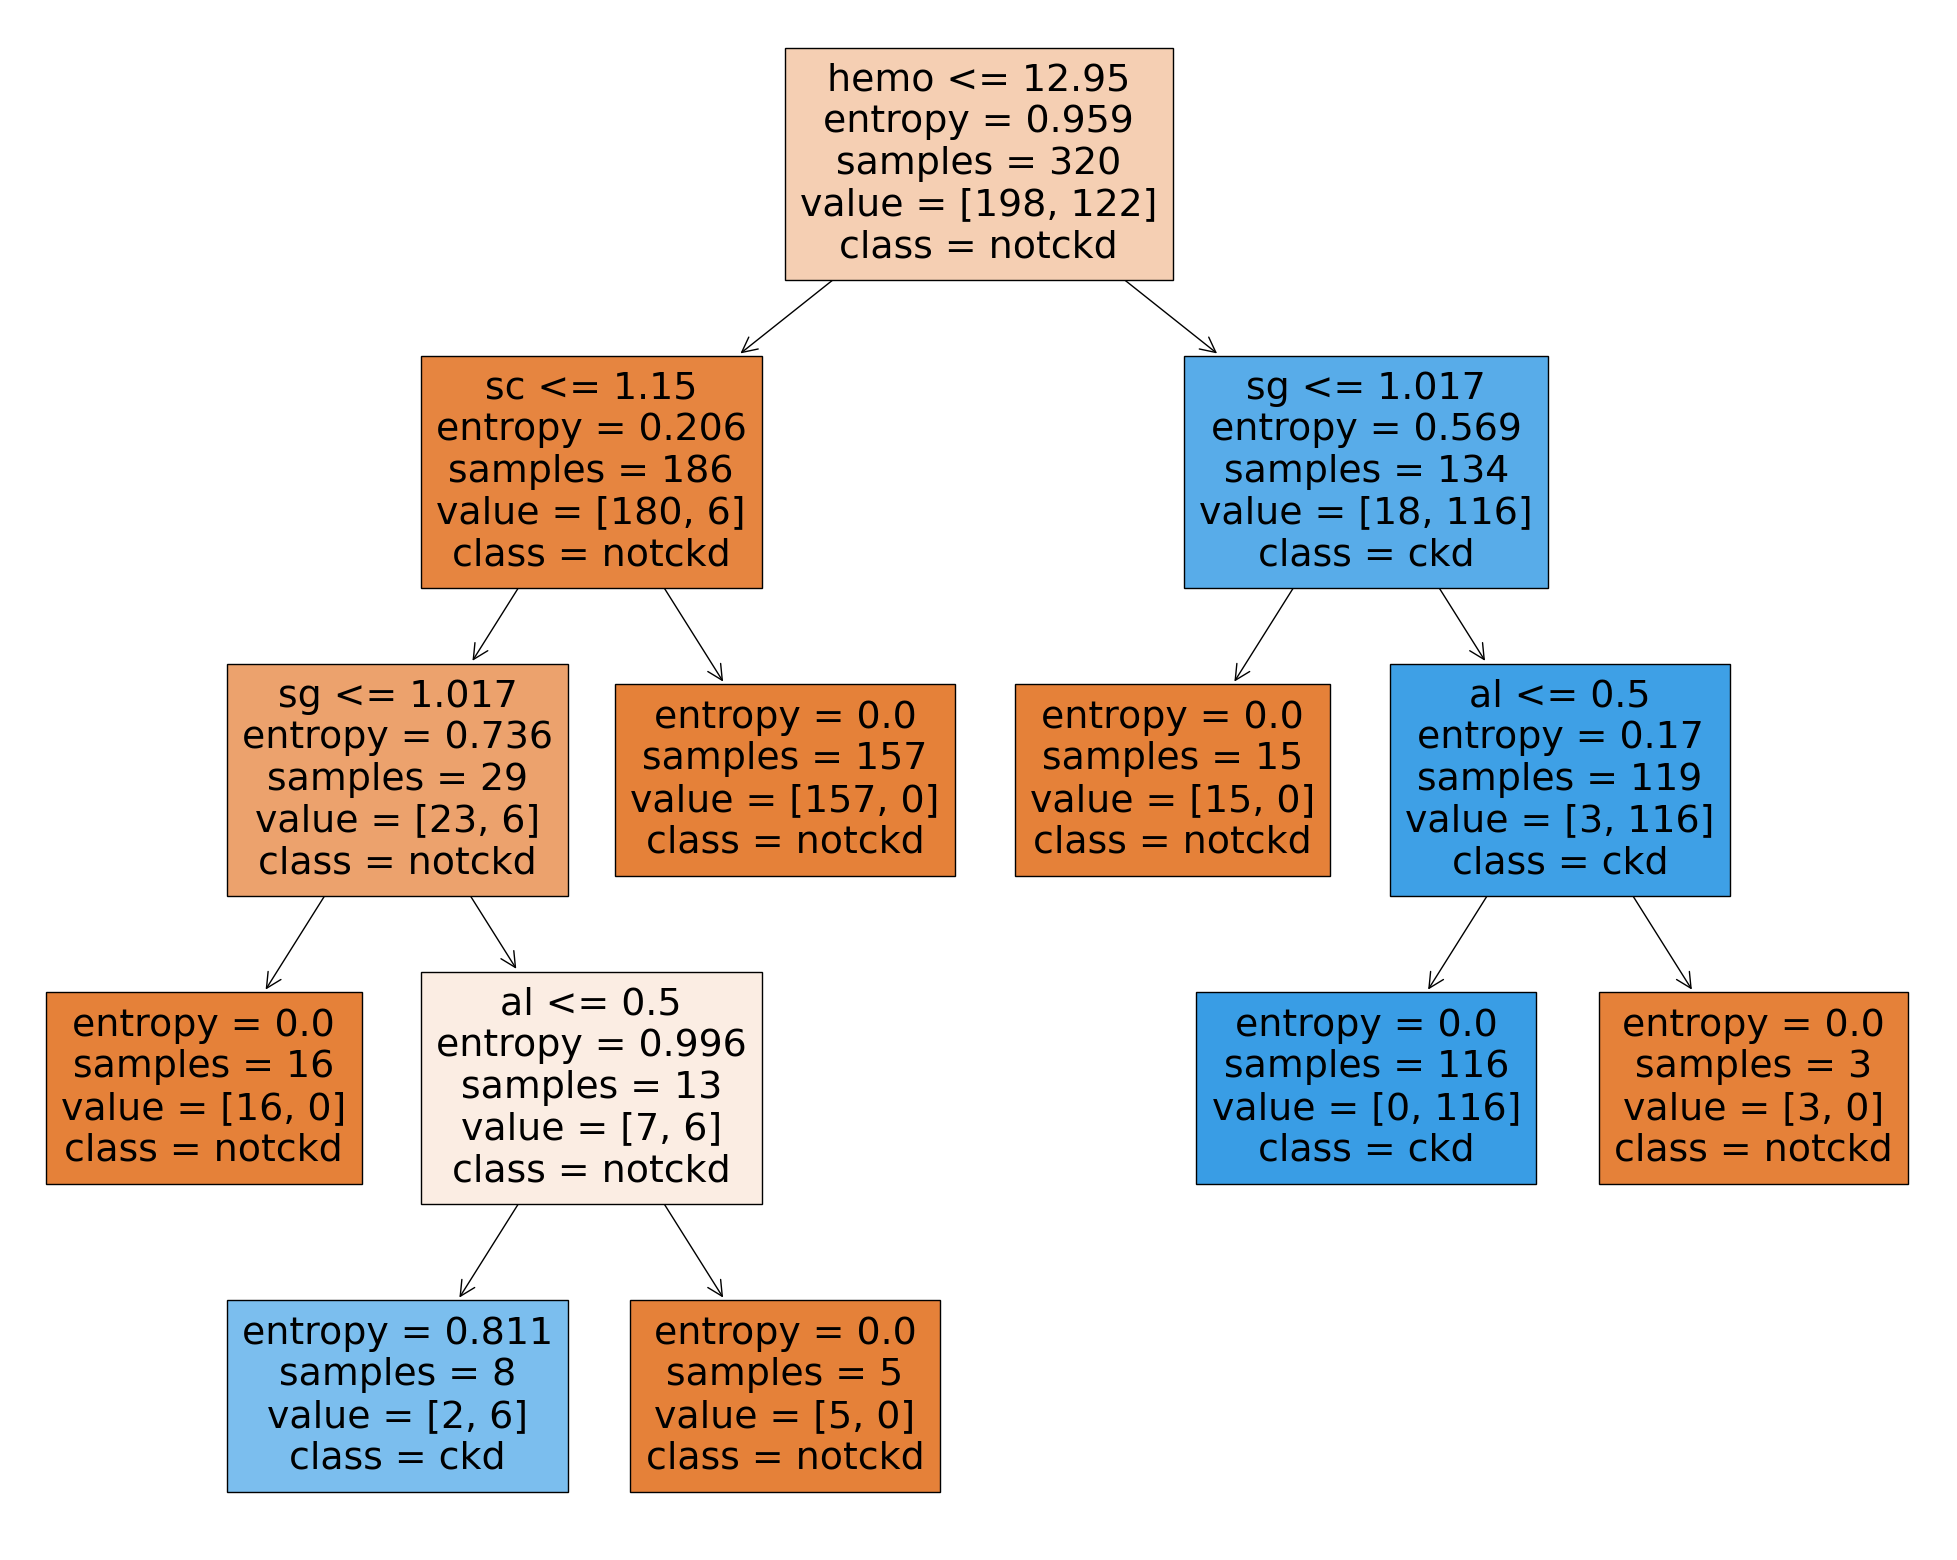

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25, 20))
plot_tree(model,
          feature_names=ind_col,
          class_names=['notckd', 'ckd'],
          filled=True)
plt.show()
